In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the paths to the Train and Test zip folders
train_zip_path = '/content/drive/MyDrive/Dataset/Zone_Wise_train/lowermodifiertrain.zip'
test_zip_path = '/content/drive/MyDrive/Dataset/Zone_wise_test/lower modifier test.zip'

# Unzip the Train and Test folders
import zipfile

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train')

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/test')

train_dir = '/content/train/lower modifier train'
test_dir = '/content/test/lower modifier test'

In [ ]:
classes = os.listdir(train_dir)
print(len(classes))
classes

6


['0x0942', '0x0941', '0x0944', '0x094D', '0x093C', '0x0943']

In [ ]:
train_transform = transforms.Compose([
   # transforms.RandomRotation(10),
    #transforms.RandomAffine(degrees=45, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandomCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=train_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  5159
Num test images:  1291


# CNN

## NEW

In [4]:
import os

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import PIL
import pathlib

In [ ]:
classes = os.listdir(train_dir)
num_classes=len(classes)
print(classes)
print(num_classes)

In [ ]:
class_names = train_dir.class_names
print(class_names)

['0x0942', '0x0941', '0x0944', '0x094D', '0x093C', '0x0943']

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(28, 28),
  batch_size=22)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(28, 28),
  batch_size=22)

Found 5159 files belonging to 6 classes.
Using 4128 files for training.
Found 1291 files belonging to 6 classes.
Using 258 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(first_image.shape)

(28, 28, 3)


In [ ]:
batch_size = 22

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                   

In [ ]:
history=model.fit(train_ds,validation_data=val_ds, epochs=epochs)

Epoch 1/50
188/188 [==============================] - 14s 8ms/step - loss: 1.7941 - accuracy: 0.1587 - val_loss: 1.7938 - val_accuracy: 0.1550
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 1.6665 - accuracy: 0.2587 - val_loss: 1.3658 - val_accuracy: 0.3643
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 1.1159 - accuracy: 0.5329 - val_loss: 0.5484 - val_accuracy: 0.7558
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.6420 - accuracy: 0.7372 - val_loss: 0.4927 - val_accuracy: 0.7907
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4367 - accuracy: 0.8353 - val_loss: 0.6062 - val_accuracy: 0.8062
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.3733 - accuracy: 0.8624 - val_loss: 0.2785 - val_accuracy: 0.9186
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.2894 - accuracy: 0.9012 - val_loss: 0.3659 - val_accuracy: 0.8372
Epoch

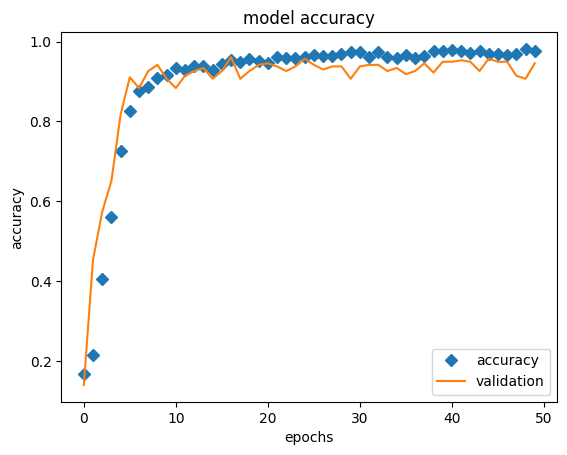

In [ ]:
plt.plot(history.history['accuracy'],'D', label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["accuracy","validation"])
plt.show()

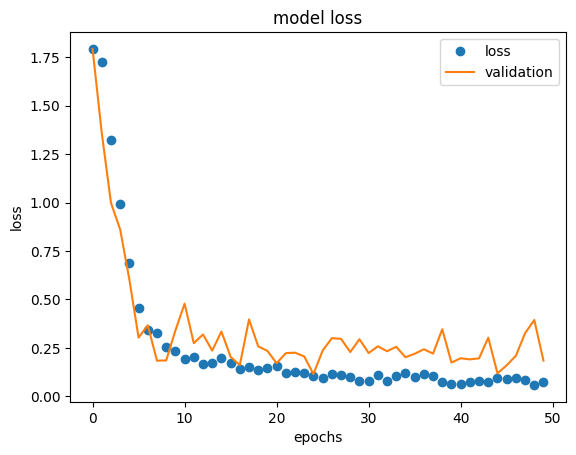

In [ ]:
plt.plot(history.history['loss'], 'o', label='loss')
plt.plot(history.history['val_loss'], label='validation')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(["loss","validation"])
plt.show()

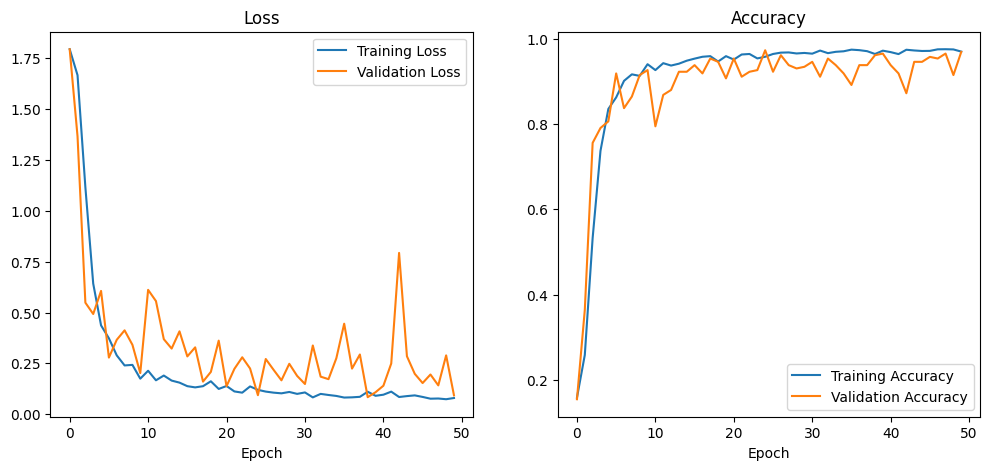

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create plots for loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.title('Loss')

# Create plots for accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.title('Accuracy')

plt.show()

In [ ]:
model.save('MyDrive/ocr1_model')

In [ ]:
model.save('/content/drive/My Drive/cnn_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/My Drive/cnn_1.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image
#test_image=image.load_img('/content/test/lower modifier test/0x0941/090a_1_62_skewed__thinnened_1.jpg',target_size=(28,28))
test_image=image.load_img('/content/test/lower modifier test/0x093C/090a_1_39_skewed__thinnened_1.jpg',target_size=(28,28))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=loaded_model.predict(test_image)
#training_set.class_indices
predicted_class_index=np.argmax(result)

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(predicted_class_index)

0


In [ ]:
import numpy as np
from keras.preprocessing import image
#test_image=image.load_img('/content/test/lower modifier test/0x0941/090a_1_62_skewed__thinnened_1.jpg',target_size=(28,28))
test_image=image.load_img('/content/test/lower modifier test/0x093C/094a_1_39.jpg',target_size=(28,28))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=loaded_model.predict(test_image)
#training_set.class_indices
predicted_class_index=np.argmax(result)

1/1 [==============================] - 0s 78ms/step


In [ ]:
predicted_class_index

0